# Day 3 PM // INTEGRAL

## Symbol

In [2]:
# Mengimport symbolic python

import sympy as sy

In [5]:
# Mendefinisikan fungsi f
x = sy.Symbol('x')
f = 2*x**2+4*x-1
f

2*x**2 + 4*x - 1

In [6]:
# Integral dari fungsi f

sy.integrate(f)

2*x**3/3 + 2*x**2 - x

## Numeric - Fungsi

In [7]:
from scipy import integrate

def f(x):
  return 2*x**2+4*x-1
  
A = integrate.quad(f,2,5)
print(A)

(117.0, 1.2989609388114332e-12)


## Numeric - Data/Array

In [8]:
from scipy import integrate
import numpy as np

def f(x):
  return 2*x**2+4*x-1

x = np.linspace(2,5)
y = f(x)

A = integrate.trapz(y,x)
A

117.00374843815077

In [9]:
#Case Menghitung Total Pendapatan tahun 2019 di Supermarket Cabang Yangon
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/ds-masterclass-h8-vol2/main/data/supermarket_sales%20-%20Sheet1.csv')
data = data[data['City']=='Yangon'].sort_values(['Date','Time']).reset_index(drop=True)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
2,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
4,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9


<AxesSubplot:>

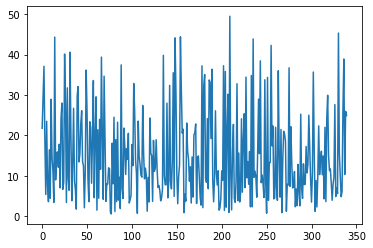

In [10]:
data['gross income'].plot(kind='line')

In [11]:
x = data.index
y = data['gross income']

total_gross_income_2019 = integrate.trapz(y,x)
print('Total Gross Income in 2019:',total_gross_income_2019)

Total Gross Income in 2019: 5033.7964999999995


In [12]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               340 non-null    object        
 1   Branch                   340 non-null    object        
 2   City                     340 non-null    object        
 3   Customer type            340 non-null    object        
 4   Gender                   340 non-null    object        
 5   Product line             340 non-null    object        
 6   Unit price               340 non-null    float64       
 7   Quantity                 340 non-null    int64         
 8   Tax 5%                   340 non-null    float64       
 9   Total                    340 non-null    float64       
 10  Date                     340 non-null    datetime64[ns]
 11  Time                     340 non-null    object        
 12  Payment                  340 non-nul

In [13]:
data['Month'] = data['Date'].dt.month

In [14]:
data_bulanan = data.groupby('Month').sum()
data_bulanan

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,6349.53,685,1841.9585,38681.1285,36839.17,566.666667,1841.9585,842.3
2,5430.93,493,1421.9105,29860.1205,28438.21,447.619048,1421.9105,658.7
3,6845.03,681,1793.2915,37659.1215,35865.83,604.761905,1793.2915,888.2


In [15]:
x = data_bulanan.index
y = data_bulanan['gross income']

total = integrate.trapz(y,x)
print('Total Gross Income on Jan - Mar:',total)

Total Gross Income on Jan - Mar: 3239.5355


In [16]:
data_bulanan['gross income'].sum()

5057.1605

### Case : Luas Area Lingkaran

In [18]:
from scipy.integrate import trapz
import numpy as np

R=30
x=np.linspace(-R,R,200)

upper = np.sqrt(R**2 - x**2)
lower = -upper

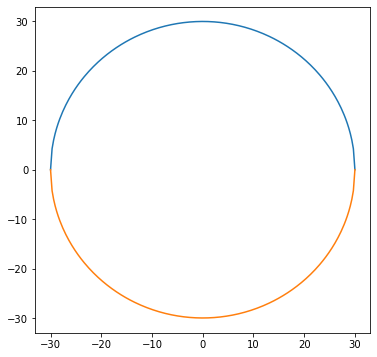

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(x,upper)
ax.plot(x,lower)

In [20]:
area = trapz(upper,x) - trapz(lower,x)

print(area)

2826.367344907366
